# **Lasso Regression**

# Lasso Regression (L1 Regularization)

Lasso (Least Absolute Shrinkage and Selection Operator) is a linear regression technique that performs both regularization and variable selection to enhance prediction accuracy and interpretability.

### 1. Mathematical Objective
Lasso minimizes the sum of squared residuals plus a penalty proportional to the sum of the absolute values of the coefficients:

$$ \min_{\beta} \left\{ \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\} $$

Where:
- $\lambda \ge 0$ is the regularization parameter (often called `alpha` in libraries like scikit-learn).
- $\lambda \sum_{j=1}^{p} |\beta_j|$ is the **L1 penalty**.

### 2. Key Characteristics
*   **Feature Selection:** Unlike Ridge (L2), Lasso can shrink coefficients to exactly zero, effectively performing automatic feature selection.
*   **Sparsity:** It produces "sparse" models, which are easier to interpret in high-dimensional datasets.
*   **Scaling Requirement:** Since the penalty is based on the magnitude of coefficients, features must be standardized (mean=0, variance=1) before fitting.

### 3. Bias-Variance Trade-off
*   **Increasing $\lambda$:** Increases bias but decreases variance (prevents overfitting).
*   **Decreasing $\lambda$:** Decreases bias but increases variance (approaches OLS).


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [46]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)

0.6540035330966079
[28.35579971]
-2.401804499932487


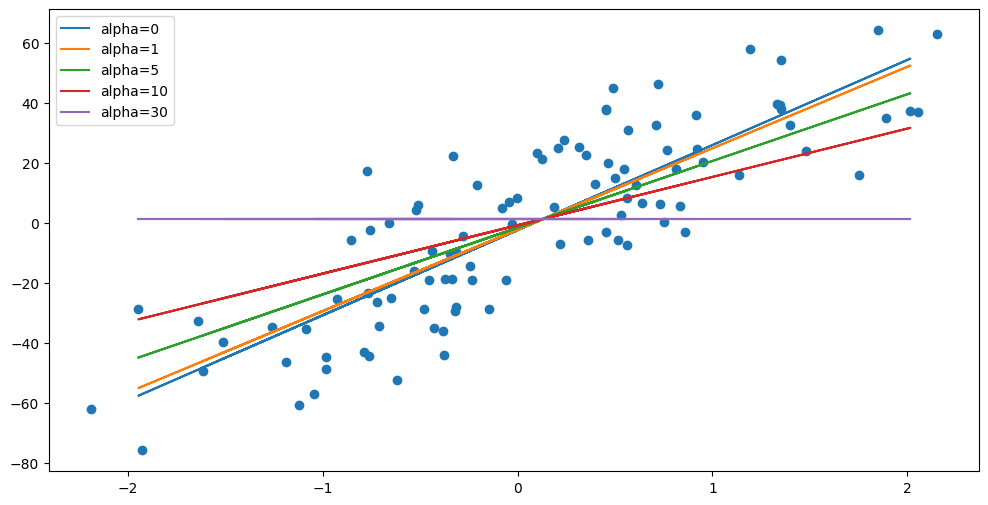

In [47]:
alphas = [0,1,5,10,30]

plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))

plt.legend()
plt.show()

# as the alpha value increases, the slope becomes more and more close to beign horizontal
    

In [48]:
reg = Lasso(alpha=0.1)

reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)

0.6545561123234068
[28.2333382]
-2.385563828971554


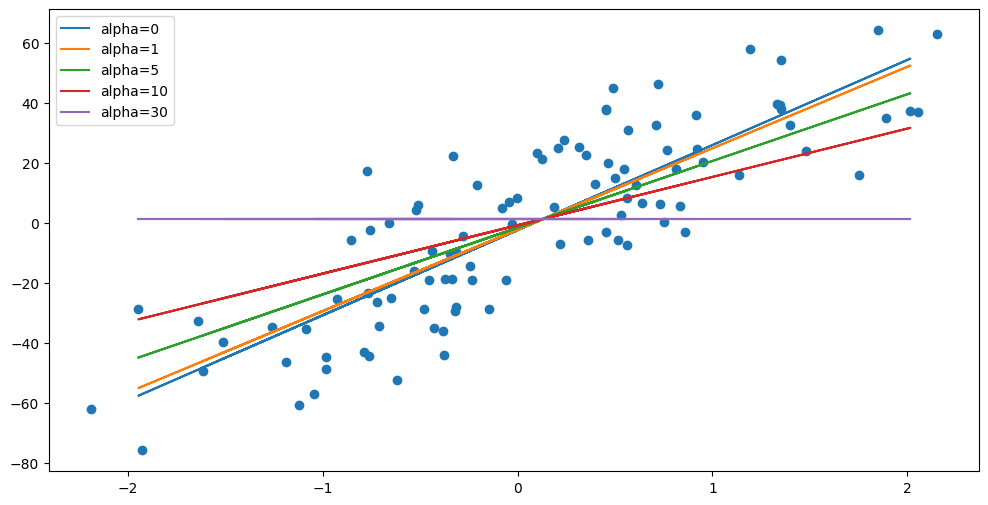

In [49]:
alphas = [0,1,5,10,30]

plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))

plt.legend()

There are 3 main things to know about alpha ($\lambda$) in Lasso:

1. Alpha = Penalty Strength: It controls how strictly you want to punish complex models.
2. Alpha = 0 (No Penalty): This is just normal Linear Regression. You use all features, even useless ones.
3. Alpha > 0 (Feature Killer): As you increase alpha, Lasso starts forcing the coefficients of useless features to become exactly ZERO. This effectively deletes those features from your model.

- Small Alpha (e.g., 0.01): Keeps most features, slight regularization.
- Large Alpha (e.g., 10): Keeps only the most important features, kills the rest (High Bias, Low Variance).